Master Theorem Visualizer Demo

1. Case 1: Bottom-heavy (Binary tree traversal)
----------------------------------------
Recurrence: T(n) = 4T(n/2) + n
Critical exponent: log_2(4) = 2.000
Critical function: n^2.000
------------------------------------------------------------
Test values: [16, 64, 256, 1024]
f(n) values: ['16.00', '64.00', '256.00', '1024.00']
n^2.000 values: ['256.00', '4096.00', '65536.00', '1048576.00']
Ratios f(n)/n^2.000: ['0.0625', '0.0156', '0.0039', '0.0010']
Case 1: f(n) grows slower than n^2.000 → Leaves dominate
Result: T(n) = Θ(n^2.000)


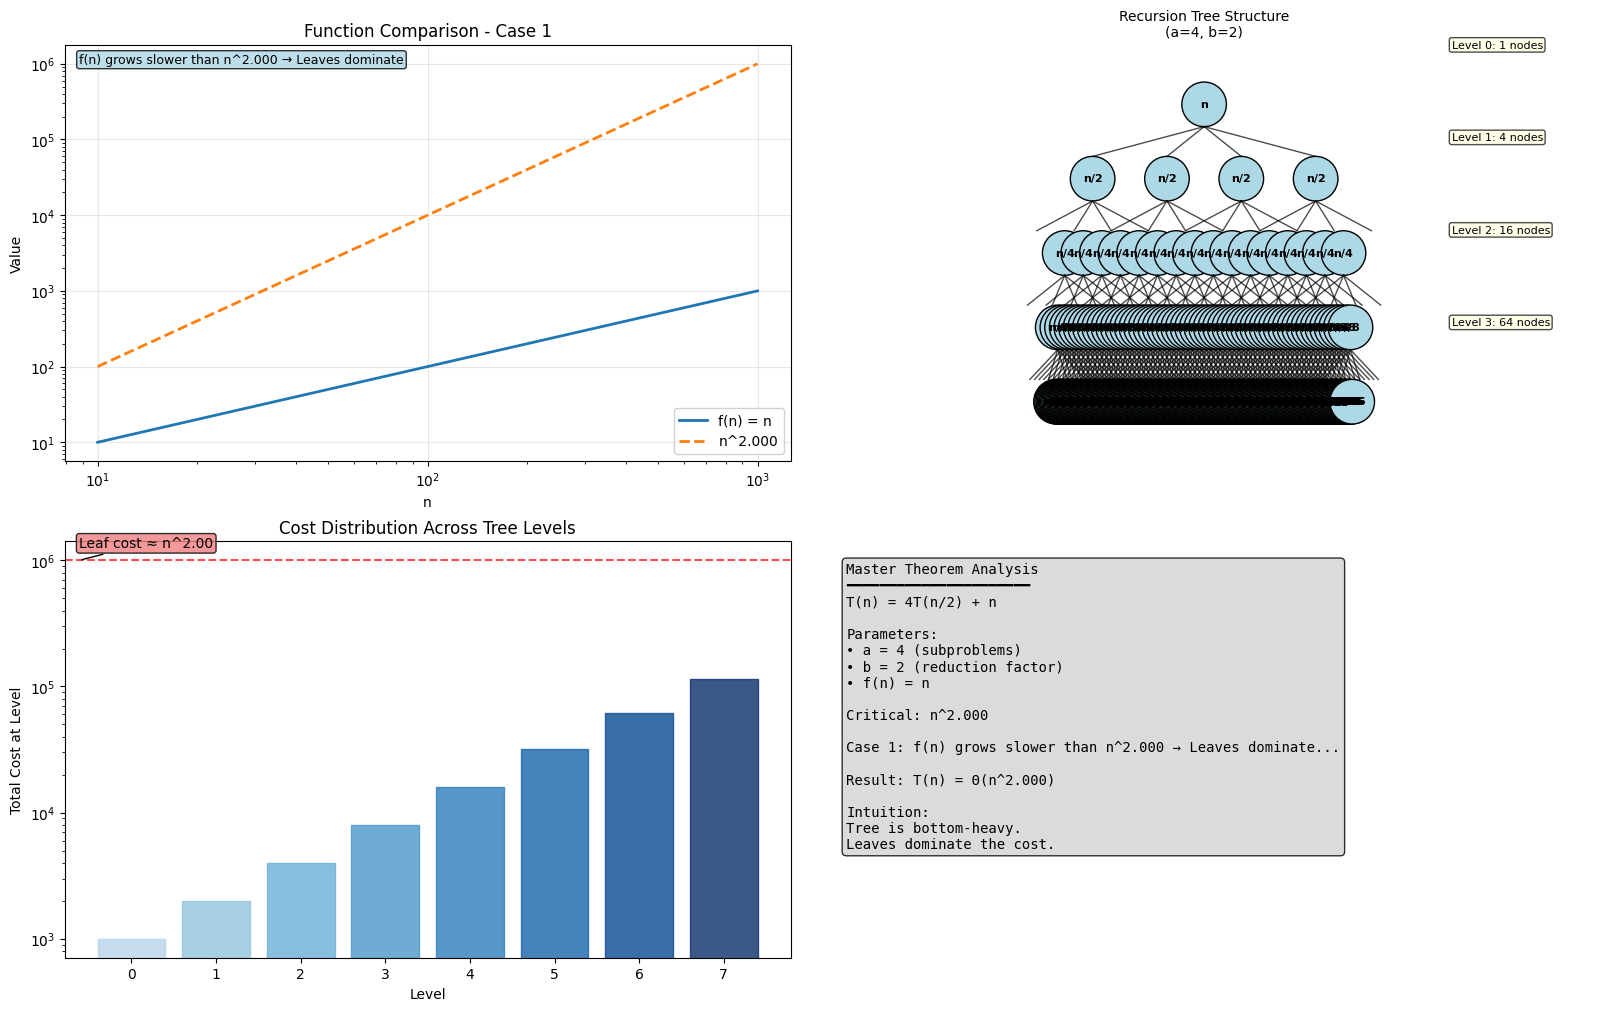

Completed analysis for: Case 1: Bottom-heavy (Binary tree traversal)

2. Case 1: Bottom-heavy
----------------------------------------
Recurrence: T(n) = 8T(n/2) + n**2
Critical exponent: log_2(8) = 3.000
Critical function: n^3.000
------------------------------------------------------------
Test values: [16, 64, 256, 1024]
f(n) values: ['256.00', '4096.00', '65536.00', '1048576.00']
n^3.000 values: ['4096.00', '262144.00', '16777216.00', '1073741824.00']
Ratios f(n)/n^3.000: ['0.0625', '0.0156', '0.0039', '0.0010']
Case 1: f(n) grows slower than n^3.000 → Leaves dominate
Result: T(n) = Θ(n^3.000)


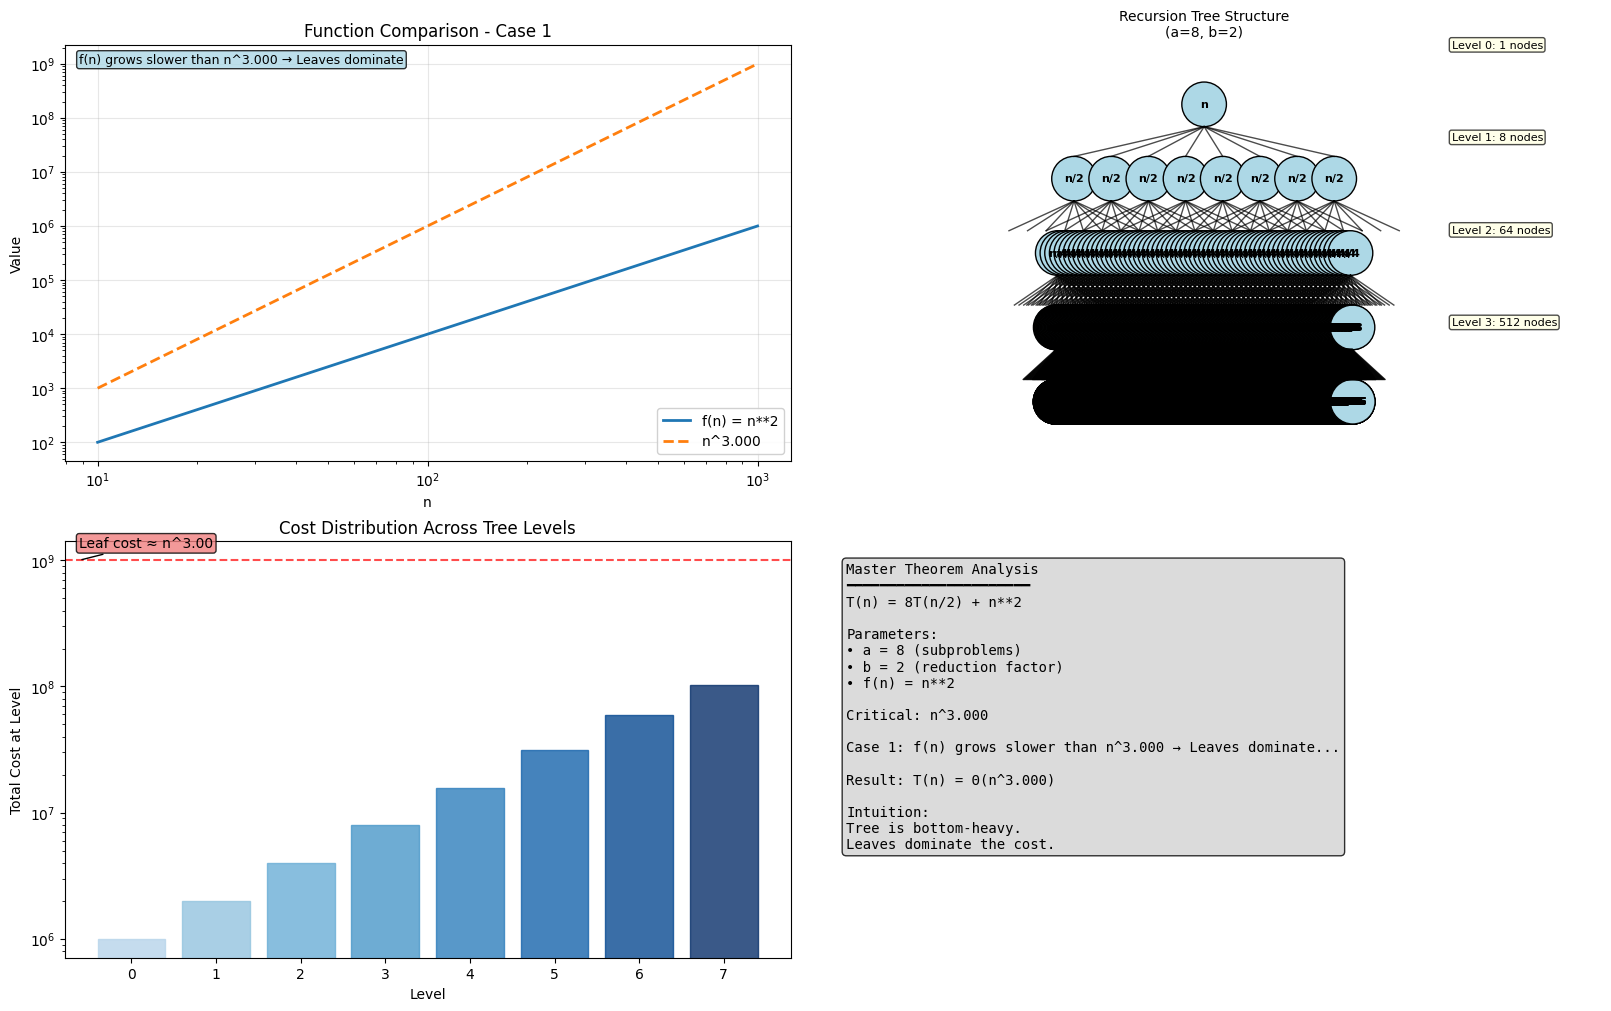

Completed analysis for: Case 1: Bottom-heavy

3. Case 2: Balanced (Merge sort)
----------------------------------------
Recurrence: T(n) = 2T(n/2) + n
Critical exponent: log_2(2) = 1.000
Critical function: n^1.000
------------------------------------------------------------
Test values: [16, 64, 256, 1024]
f(n) values: ['16.00', '64.00', '256.00', '1024.00']
n^1.000 values: ['16.00', '64.00', '256.00', '1024.00']
Ratios f(n)/n^1.000: ['1.0000', '1.0000', '1.0000', '1.0000']
Case 2: f(n) grows same as n^1.000 → All levels contribute equally
Result: T(n) = Θ(n^1.000 log n)


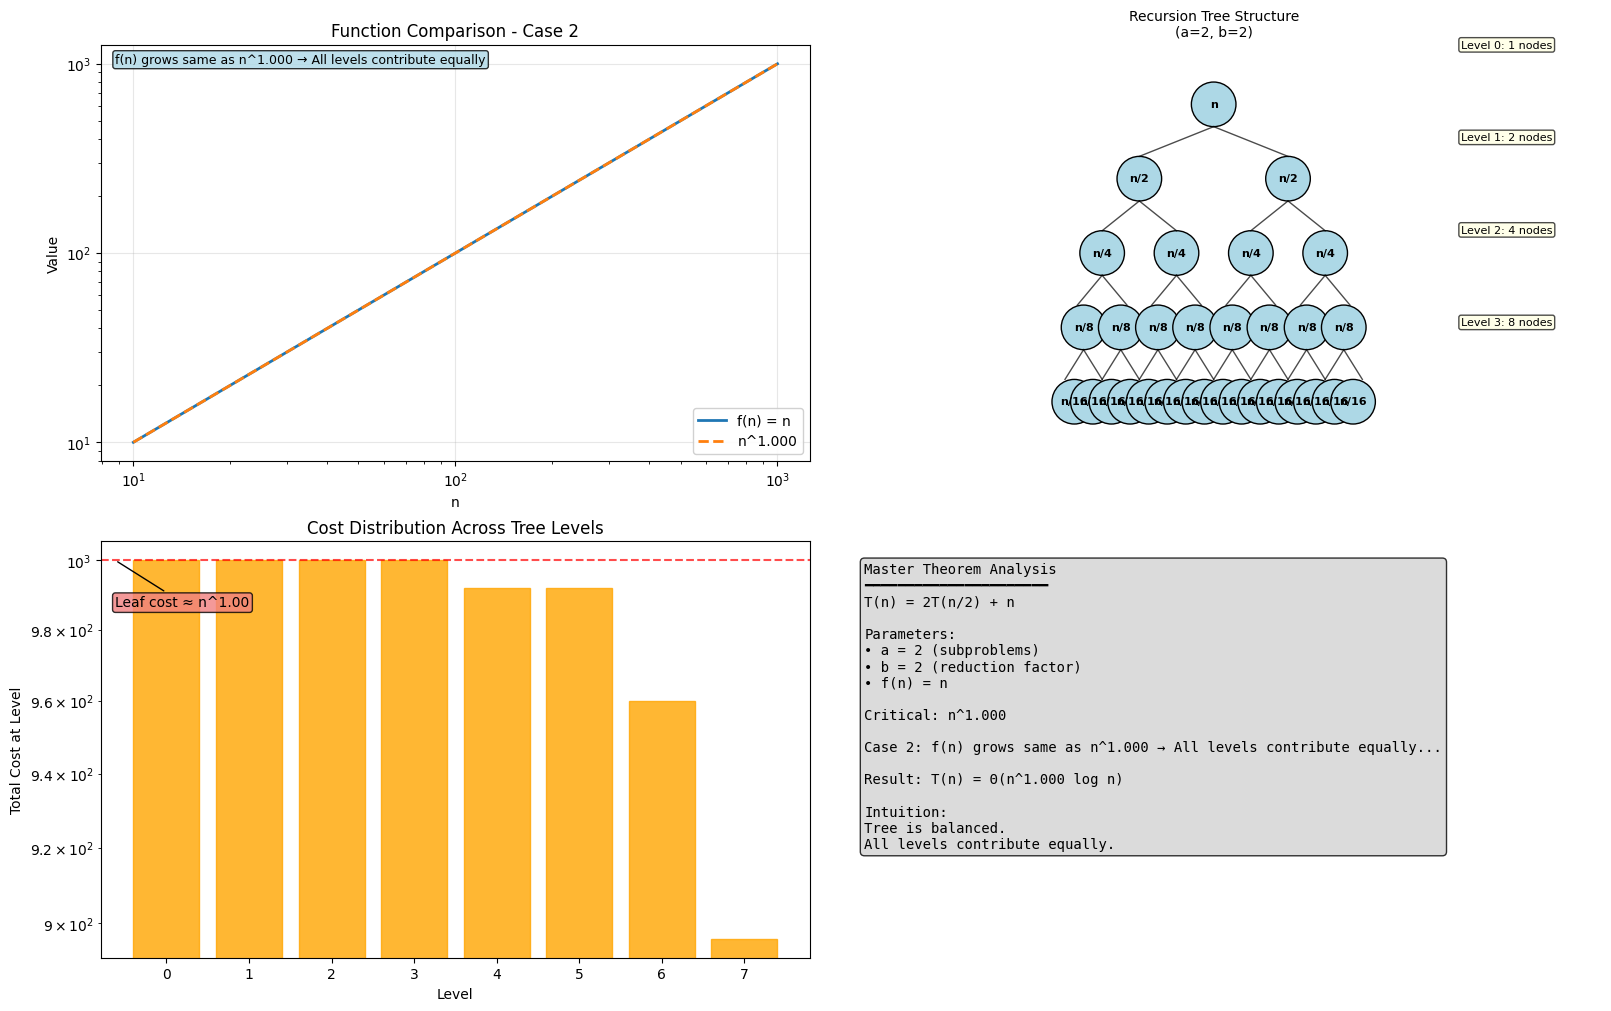

Completed analysis for: Case 2: Balanced (Merge sort)

4. Case 2: Balanced
----------------------------------------
Recurrence: T(n) = 4T(n/2) + n**2
Critical exponent: log_2(4) = 2.000
Critical function: n^2.000
------------------------------------------------------------
Test values: [16, 64, 256, 1024]
f(n) values: ['256.00', '4096.00', '65536.00', '1048576.00']
n^2.000 values: ['256.00', '4096.00', '65536.00', '1048576.00']
Ratios f(n)/n^2.000: ['1.0000', '1.0000', '1.0000', '1.0000']
Case 2: f(n) grows same as n^2.000 → All levels contribute equally
Result: T(n) = Θ(n^2.000 log n)


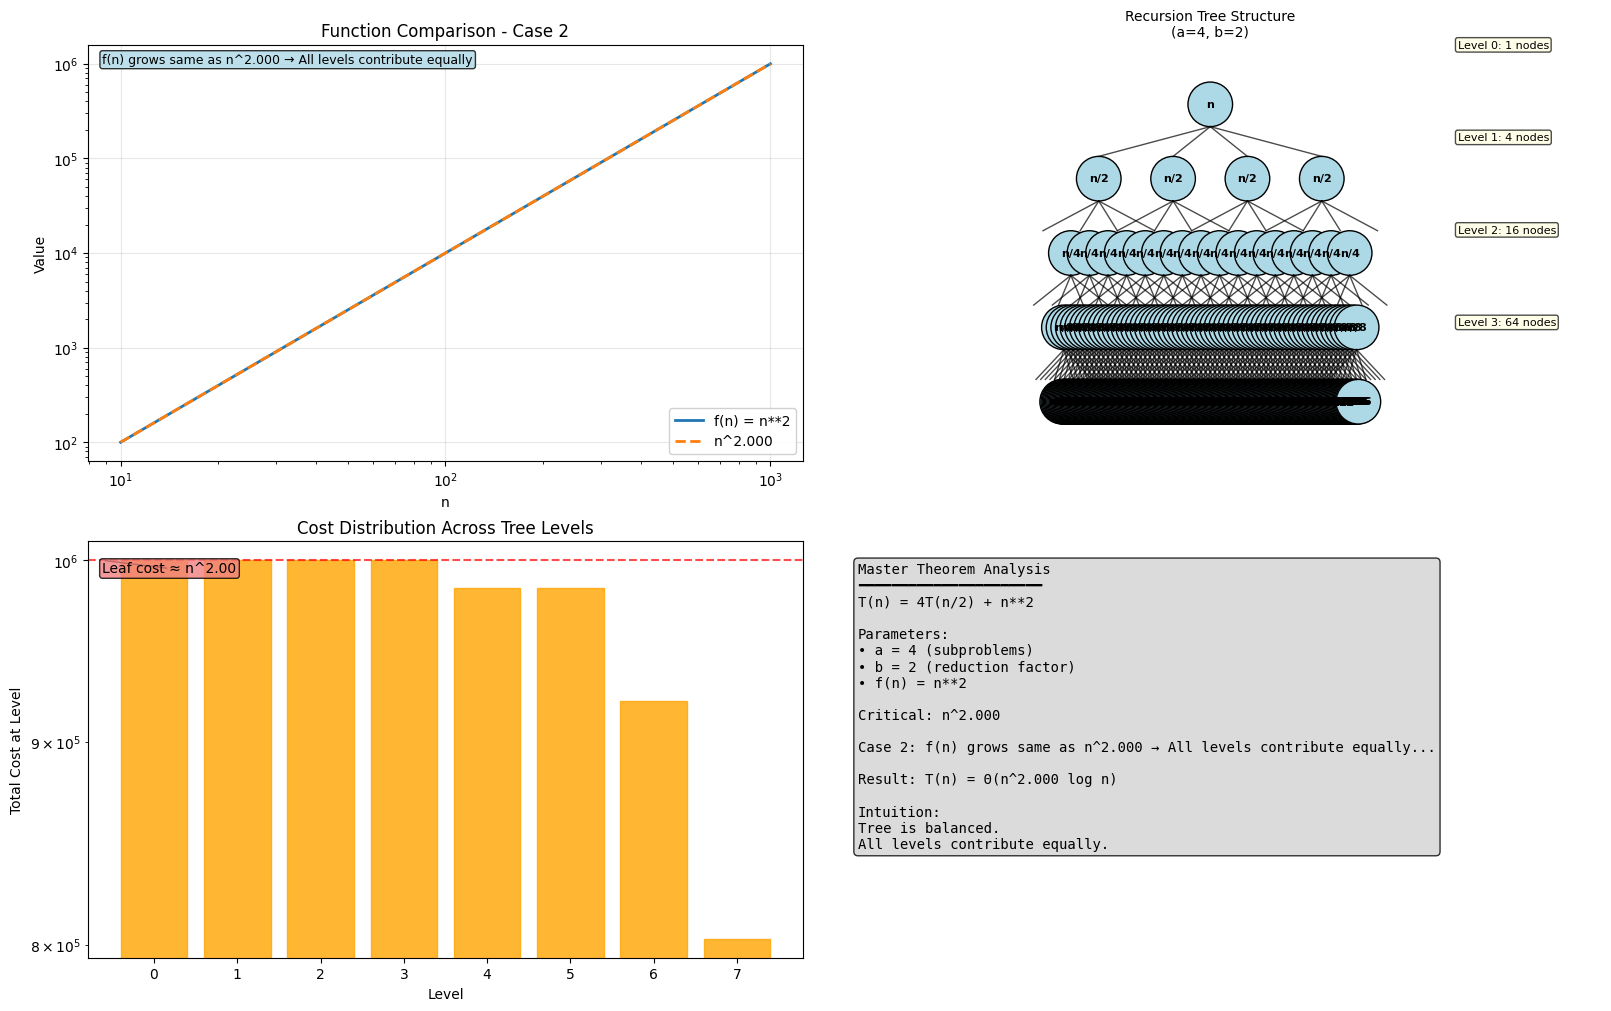

Completed analysis for: Case 2: Balanced

5. Case 3: Top-heavy
----------------------------------------
Recurrence: T(n) = 2T(n/2) + n**2
Critical exponent: log_2(2) = 1.000
Critical function: n^1.000
------------------------------------------------------------
Test values: [16, 64, 256, 1024]
f(n) values: ['256.00', '4096.00', '65536.00', '1048576.00']
n^1.000 values: ['16.00', '64.00', '256.00', '1024.00']
Ratios f(n)/n^1.000: ['16.0000', '64.0000', '256.0000', '1024.0000']
Case 3: f(n) grows faster than n^1.000 → Root dominates
Result: T(n) = Θ(n**2)


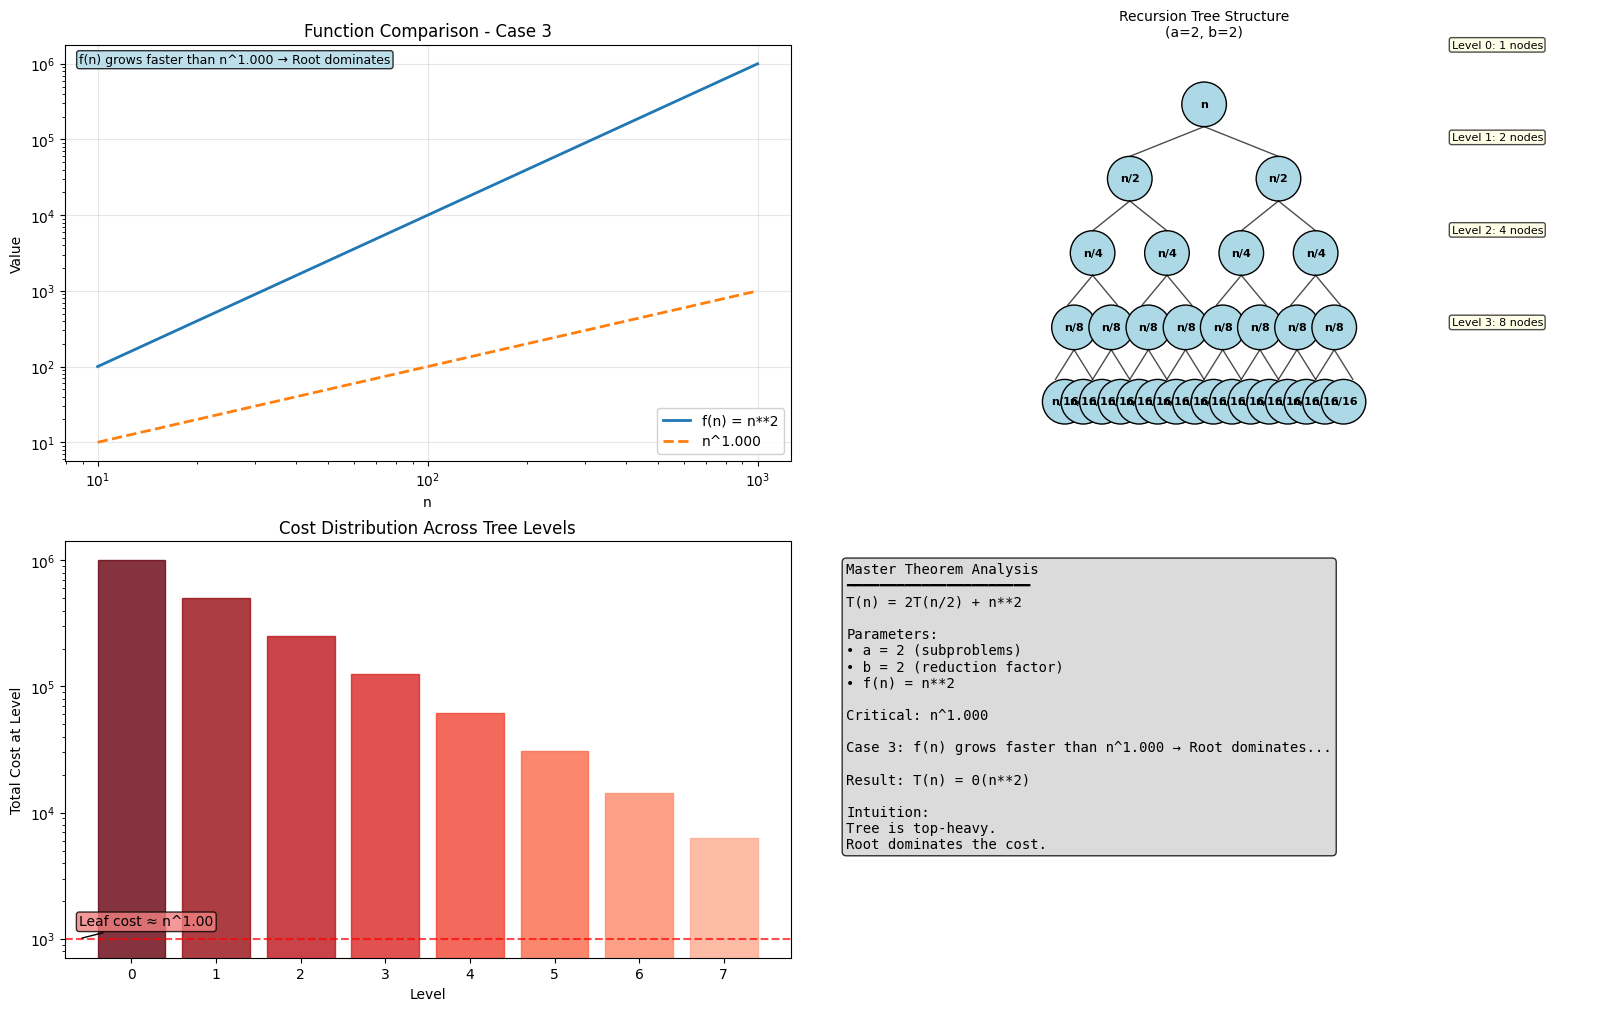

Completed analysis for: Case 3: Top-heavy

6. Case 3: Top-heavy
----------------------------------------
Recurrence: T(n) = 2T(n/2) + n**3
Critical exponent: log_2(2) = 1.000
Critical function: n^1.000
------------------------------------------------------------
Test values: [16, 64, 256, 1024]
f(n) values: ['4096.00', '262144.00', '16777216.00', '1073741824.00']
n^1.000 values: ['16.00', '64.00', '256.00', '1024.00']
Ratios f(n)/n^1.000: ['256.0000', '4096.0000', '65536.0000', '1048576.0000']
Case 3: f(n) grows faster than n^1.000 → Root dominates
Result: T(n) = Θ(n**3)


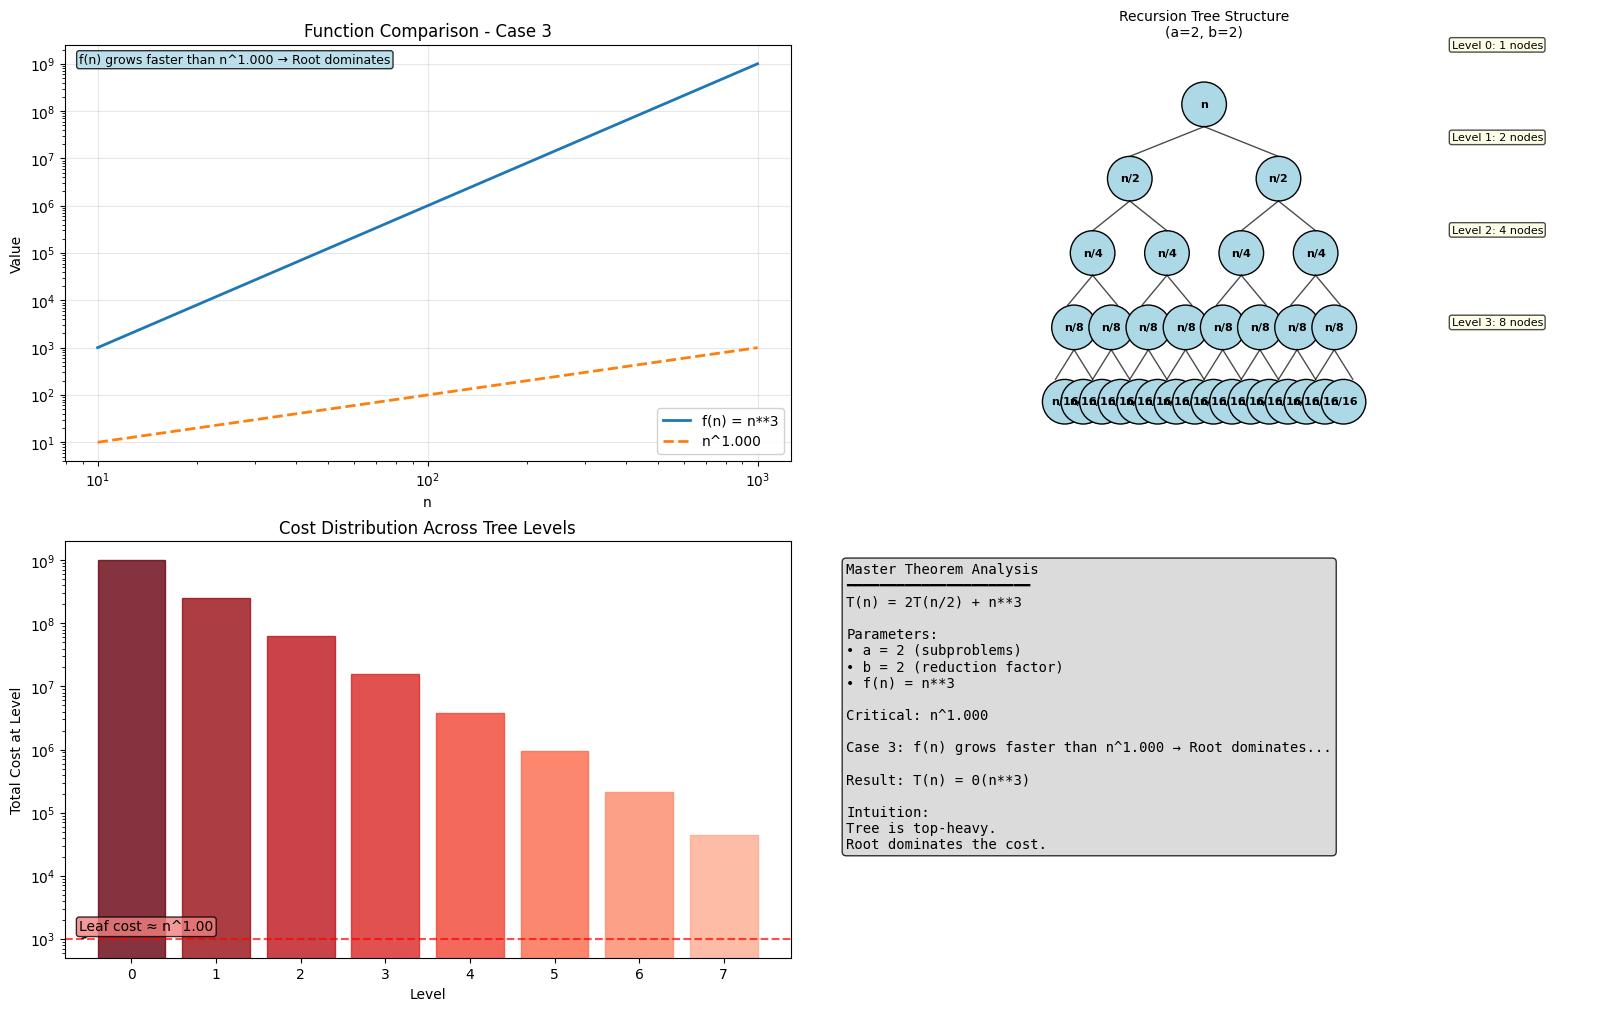

Completed analysis for: Case 3: Top-heavy


In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

class MasterTheoremVisualizer:
    def __init__(self):
        pass

    # -----------------------------
    # Utilities
    # -----------------------------
    def evaluate_function(self, f_str, n_val):
        """Safely evaluate a function string at a given n value."""
        try:
            s = f_str.replace("^", "**")
            # only replace bare 'log' with math.log when needed
            if "log(" not in s:
                s = s.replace("log", "log")
            safe = {
                "n": n_val,
                "log": math.log,
                "sqrt": math.sqrt,
                "pow": pow,
                "__builtins__": {},
            }
            result = eval(s, safe)
            return float(result)
        except Exception:
            # basic fallbacks
            if f_str in ("n", "n**1"):
                return float(n_val)
            if f_str == "n**2":
                return float(n_val ** 2)
            if f_str == "n**3":
                return float(n_val ** 3)
            if f_str == "1":
                return 1.0
            if "log" in f_str and "n" in f_str:
                return float(n_val * math.log(n_val))
            return 1.0

    # -----------------------------
    # Public API
    # -----------------------------
    def analyze_recurrence(self, a, b, f_expr_str, n_max=1000, use_gridspec=True):
        """
        Analyze T(n) = a*T(n/b) + f(n); create 2x2 visualization.
        """
        log_b_a = math.log(a) / math.log(b)
        print(f"Recurrence: T(n) = {a}T(n/{b}) + {f_expr_str}")
        print(f"Critical exponent: log_{b}({a}) = {log_b_a:.3f}")
        print(f"Critical function: n^{log_b_a:.3f}")
        print("-" * 60)

        case = self._determine_case(f_expr_str, log_b_a, a, b)

        # ---------- Figure ----------
        fig = plt.figure(figsize=(16, 10), constrained_layout=True)

        if use_gridspec:
            gs = fig.add_gridspec(
                2, 2, width_ratios=[1.05, 1.15], height_ratios=[1, 1]
            )
            ax1 = fig.add_subplot(gs[0, 0])
            ax2 = fig.add_subplot(gs[0, 1])
            ax3 = fig.add_subplot(gs[1, 0])
            ax4 = fig.add_subplot(gs[1, 1])
        else:
            ax1 = fig.add_subplot(2, 2, 1)
            ax2 = fig.add_subplot(2, 2, 2)
            ax3 = fig.add_subplot(2, 2, 3)
            ax4 = fig.add_subplot(2, 2, 4)

        # panels
        self._plot_function_comparison(ax1, f_expr_str, log_b_a, n_max, case)
        self._plot_recursion_tree(ax2, a, b, f_expr_str, max_levels=4)
        self._plot_level_costs(ax3, a, b, f_expr_str, log_b_a, case)
        self._plot_case_analysis(ax4, case, a, b, f_expr_str, log_b_a)

        plt.show()
        return case

    # -----------------------------
    # Case detection
    # -----------------------------
    def _determine_case(self, f_expr_str, log_b_a, a, b):
        test_values = [16, 64, 256, 1024]
        f_values, critical_values = [], []

        for n_val in test_values:
            try:
                f_val = self.evaluate_function(f_expr_str, n_val)
                crit_val = float(n_val ** log_b_a)
                f_values.append(f_val)
                critical_values.append(crit_val)
            except Exception as e:
                print(f"Error evaluating at n={n_val}: {e}")

        if not f_values:
            return {
                "number": "Error",
                "result": "Could not analyze",
                "explanation": "Function evaluation failed",
            }

        ratios = [f / c for f, c in zip(f_values, critical_values)]
        print(f"Test values: {test_values[:len(ratios)]}")
        print(f"f(n) values: {[f'{v:.2f}' for v in f_values]}")
        print(f"n^{log_b_a:.3f} values: {[f'{v:.2f}' for v in critical_values]}")
        print(f"Ratios f(n)/n^{log_b_a:.3f}: {[f'{r:.4f}' for r in ratios]}")

        if len(ratios) > 1:
            ratio_trend = [ratios[i + 1] / ratios[i] for i in range(len(ratios) - 1)]
            avg_trend = sum(ratio_trend) / len(ratio_trend)

            if avg_trend < 0.8:
                case_num = 1
                result = f"Θ(n^{log_b_a:.3f})"
                explanation = (
                    f"f(n) grows slower than n^{log_b_a:.3f} → Leaves dominate"
                )
            elif 0.8 <= avg_trend <= 1.2:
                case_num = 2
                result = f"Θ(n^{log_b_a:.3f} log n)"
                explanation = (
                    f"f(n) grows same as n^{log_b_a:.3f} → All levels contribute equally"
                )
            else:
                case_num = 3
                regularity_holds = self._check_regularity(f_expr_str, a, b)
                if regularity_holds:
                    result = f"Θ({f_expr_str})"
                    explanation = (
                        f"f(n) grows faster than n^{log_b_a:.3f} → Root dominates"
                    )
                else:
                    case_num = "3*"
                    result = "Master Theorem doesn't apply"
                    explanation = "Regularity condition fails"
        else:
            if ratios[0] < 1:
                case_num = 1
                result = f"Θ(n^{log_b_a:.3f})"
                explanation = (
                    f"f(n) grows slower than n^{log_b_a:.3f} → Leaves dominate"
                )
            elif ratios[0] == 1:
                case_num = 2
                result = f"Θ(n^{log_b_a:.3f} log n)"
                explanation = (
                    f"f(n) grows same as n^{log_b_a:.3f} → All levels contribute equally"
                )
            else:
                case_num = 3
                result = f"Θ({f_expr_str})"
                explanation = (
                    f"f(n) grows faster than n^{log_b_a:.3f} → Root dominates"
                )

        print(f"Case {case_num}: {explanation}")
        print(f"Result: T(n) = {result}")

        return {
            "number": case_num,
            "result": result,
            "explanation": explanation,
            "ratios": ratios,
            "test_values": test_values[: len(ratios)],
        }

    def _check_regularity(self, f_expr_str, a, b):
        try:
            for n_val in [64, 128, 256, 512]:
                f_n = self.evaluate_function(f_expr_str, n_val)
                f_n_b = self.evaluate_function(f_expr_str, n_val / b)
                if f_n <= 0:
                    return False
                ratio = (a * f_n_b) / f_n
                if ratio >= 1:
                    return False
            return True
        except Exception:
            # Be permissive if we can't verify numerically
            return True

    # -----------------------------
    # Plots
    # -----------------------------
    def _plot_function_comparison(self, ax, f_expr_str, log_b_a, n_max, case):
        n_vals = np.logspace(1, np.log10(n_max), 100)

        f_vals = []
        for n_val in n_vals:
            try:
                f_vals.append(self.evaluate_function(f_expr_str, n_val))
            except Exception:
                f_vals.append(np.nan)

        critical_vals = n_vals ** log_b_a
        valid = ~np.isnan(f_vals)
        n_clean = n_vals[valid]
        f_clean = np.asarray(f_vals)[valid]
        c_clean = critical_vals[valid]

        ax.loglog(n_clean, f_clean, lw=2, label=f"f(n) = {f_expr_str}")
        ax.loglog(n_clean, c_clean, "--", lw=2, label=f"n^{log_b_a:.3f}")
        ax.set_xlabel("n")
        ax.set_ylabel("Value")
        ax.set_title(f"Function Comparison - Case {case['number']}")
        ax.legend(loc="lower right", framealpha=0.9)
        ax.grid(True, alpha=0.3)

        ax.text(
            0.02,
            0.98,
            case["explanation"],
            transform=ax.transAxes,
            bbox=dict(boxstyle="round,pad=0.2", facecolor="lightblue", alpha=0.8),
            va="top",
            fontsize=9,
            wrap=True,
        )

    def _plot_recursion_tree(self, ax, a, b, f_expr_str, max_levels):
        tree_data = []

        def build(level, n_size, x_pos, y_pos, width):
            if level > max_levels:
                return
            try:
                cost_val = self.evaluate_function(f_expr_str, n_size)
            except Exception:
                cost_val = 1.0
            tree_data.append(
                {"level": level, "x": x_pos, "y": y_pos, "n_size": n_size, "cost": cost_val}
            )
            if level < max_levels:
                child_width = width / max(a, 2)
                for i in range(a):
                    child_x = x_pos + (i - (a - 1) / 2) * child_width
                    child_y = y_pos - 1
                    build(level + 1, max(1, n_size // b), child_x, child_y, child_width)

        build(0, 64, 0.0, 0.0, 4.0)

        # edges
        for node in tree_data:
            if node["level"] < max_levels:
                for i in range(a):
                    child_x = node["x"] + (i - (a - 1) / 2) * (4 / max(a, 2)) / (node["level"] + 1)
                    child_y = node["y"] - 1
                    ax.plot([node["x"], child_x], [node["y"] - 0.3, child_y + 0.3], "k-", lw=1, alpha=0.7)

        # nodes
        for node in tree_data:
            circ = plt.Circle((node["x"], node["y"]), 0.3, color="lightblue", ec="black", lw=1)
            ax.add_patch(circ)
            ax.text(
                node["x"],
                node["y"],
                f"n/{b**node['level']}" if node["level"] > 0 else "n",
                ha="center",
                va="center",
                fontsize=8,
                weight="bold",
            )

        # axes bounds and cosmetics
        ax.set_xlim(-3.2, 3.2)
        ax.set_ylim(-max_levels - 0.8, 0.8)
        ax.set_aspect("equal")
        ax.set_title(f"Recursion Tree Structure\n(a={a}, b={b})", fontsize=10)
        ax.axis("off")

        # level badges (inside axes using axes-fraction coords)
        for level in range(min(max_levels + 1, 4)):
            nodes_at_level = a ** level
            y_frac = 1 - (level / (max_levels + 0.5))
            ax.text(
                1.02,
                y_frac,
                f"Level {level}: {nodes_at_level} nodes",
                transform=ax.transAxes,
                fontsize=8,
                va="center",
                bbox=dict(boxstyle="round,pad=0.2", facecolor="lightyellow", alpha=0.7),
                clip_on=False,
            )

    def _plot_level_costs(self, ax, a, b, f_expr_str, log_b_a, case):
        levels = range(8)
        level_costs = []

        n_val = 1000
        for level in levels:
            nodes = a ** level
            n_at_level = max(1, n_val // (b ** level))
            try:
                cost_per_node = self.evaluate_function(f_expr_str, n_at_level)
            except Exception:
                cost_per_node = 1.0
            level_costs.append(nodes * cost_per_node)

        bars = ax.bar(levels, level_costs, alpha=0.8)

        if case["number"] == 1:
            colors = plt.cm.Blues(np.linspace(0.3, 1.0, len(bars)))
        elif case["number"] == 2:
            colors = ["orange"] * len(bars)
        else:
            colors = plt.cm.Reds(np.linspace(1.0, 0.3, len(bars)))
        for bar, c in zip(bars, colors):
            bar.set_color(c)

        ax.set_xlabel("Level")
        ax.set_ylabel("Total Cost at Level")
        ax.set_title("Cost Distribution Across Tree Levels")
        ax.set_yscale("log")

        # robust leaf-line + annotation
        leaf_cost = n_val ** log_b_a
        ax.axhline(y=leaf_cost, color="red", linestyle="--", alpha=0.7)

        # compute safe y for text
        ymin, ymax = ax.get_ylim()
        y_text = min(leaf_cost * 1.2, ymax / 1.02)

        ax.annotate(
            f"Leaf cost ≈ n^{log_b_a:.2f}",
            xy=(0.02, leaf_cost),
            xycoords=("axes fraction", "data"),
            xytext=(0.02, y_text),
            textcoords=("axes fraction", "data"),
            bbox=dict(boxstyle="round,pad=0.2", facecolor="lightcoral", alpha=0.8),
            va="bottom",
            ha="left",
            arrowprops=dict(arrowstyle="-"),
        )

    def _plot_case_analysis(self, ax, case, a, b, f_expr_str, log_b_a):
        ax.axis("off")
        summary_text = (
            "Master Theorem Analysis\n"
            "━━━━━━━━━━━━━━━━━━━━━━\n"
            f"T(n) = {a}T(n/{b}) + {f_expr_str}\n\n"
            "Parameters:\n"
            f"• a = {a} (subproblems)\n"
            f"• b = {b} (reduction factor)\n"
            f"• f(n) = {f_expr_str}\n\n"
            f"Critical: n^{log_b_a:.3f}\n\n"
            f"Case {case['number']}: {case['explanation'][:60]}...\n\n"
            f"Result: T(n) = {case['result']}\n"
        )

        if case["number"] == 1:
            intuition = "Tree is bottom-heavy.\nLeaves dominate the cost."
        elif case["number"] == 2:
            intuition = "Tree is balanced.\nAll levels contribute equally."
        elif case["number"] == 3:
            intuition = "Tree is top-heavy.\nRoot dominates the cost."
        else:
            intuition = "Master Theorem doesn't apply."

        summary_text += f"\nIntuition:\n{intuition}"

        ax.text(
            0.05,
            0.95,
            summary_text,
            transform=ax.transAxes,
            fontsize=10,
            va="top",
            fontfamily="monospace",
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.8),
            wrap=True,
        )


# -----------------------------
# Example usage and tests
# -----------------------------
def demo_master_theorem():
    viz = MasterTheoremVisualizer()
    print("Master Theorem Visualizer Demo")
    print("=" * 50)
    tests = [
        (4, 2, "n", "Case 1: Bottom-heavy (Binary tree traversal)"),
        (8, 2, "n**2", "Case 1: Bottom-heavy"),
        (2, 2, "n", "Case 2: Balanced (Merge sort)"),
        (4, 2, "n**2", "Case 2: Balanced"),
        (2, 2, "n**2", "Case 3: Top-heavy"),
        (2, 2, "n**3", "Case 3: Top-heavy"),
    ]
    for i, (a, b, f_str, desc) in enumerate(tests):
        print(f"\n{i+1}. {desc}\n" + "-" * 40)
        try:
            viz.analyze_recurrence(a, b, f_str, n_max=1000)
            print(f"Completed analysis for: {desc}")
        except Exception as e:
            print(f"Error: {e}")


if __name__ == "__main__":
    demo_master_theorem()
